In [8]:
%%bash
pip3 install py-automl

  Using cached https://files.pythonhosted.org/packages/75/92/57179ed45307ec6179e344231c47da7f3f3da9e2eee5c8ab506bd279ce4e/numpy-1.17.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/73/9b/52e228545d14f14bb2a1622e225f38463c8726645165e1cb7dde95bfe6d4/pandas-0.25.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a0/c5/d2238762d780dde84a20b8c761f563fe882b88c5a5fb03c056547c442a19/scikit_learn-0.21.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f5/20/865d4785f86e86f7ad7ebd52fc14810ef59ef13cd959f1363a2615d1c665/pandas_summary-0.0.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e6/c3/eda1f5765a176e9561b38479818b6e18fbf0ee1f259d3cc5b839377c35f2/pandas_bokeh-0.3-py2.py3-none-any.whl
  Usi

In [5]:
from pyautoml import Clean, Preprocess, Feature
import pandas as pd
import pandas_profiling
pd.options.mode.chained_assignment = None

train_data = pd.read_csv('data/train.csv') 

In [6]:
clean = Clean(data=train_data, target_field='Survived', report_name='Titanic')

In [7]:
clean.train_data.profile_report(style={'full_width': True})

## Cleaning

In [3]:
clean.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712,712,712,NaN,NaN,564,712,712,NaN,712,NaN,NaN
mean,446.667,0.379213,2.32725,NaN,NaN,29.4917,0.532303,0.360955,NaN,31.1398,NaN,NaN
std,256.014,0.485532,0.834178,NaN,NaN,14.3547,1.15547,0.763288,NaN,48.7776,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,227.75,0,2,NaN,NaN,20,0,0,NaN,7.8958,NaN,NaN
50%,444.5,0,3,NaN,NaN,28,0,0,NaN,13.825,NaN,NaN
75%,670.25,1,3,NaN,NaN,38,1,0,NaN,30.5,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,712,712,712,712,712,564,712,712,712,712,164,712
uniques,712,2,3,712,2,85,7,7,572,228,127,3


In [4]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,712,712,712,712,712,564,712,712,712,712,164,712
uniques,712,2,3,712,2,85,7,7,572,228,127,3
missing,0,0,0,0,0,148,0,0,0,0,548,0
missing_perc,0%,0%,0%,0%,0%,20.79%,0%,0%,0%,0%,76.97%,0%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


mean                        31.1398
std                         48.7776
variance                    2379.26
min                               0
max                         512.329
mode                           8.05
5%                          7.13419
25%                          7.8958
50%                          13.825
75%                            30.5
95%                         110.883
iqr                         22.6042
kurtosis                    41.9352
skewness                    5.34202
sum                         22171.5
mad                         27.1349
cv                          1.56641
zeros_num                        13
zeros_perc                    1.83%
deviating_of_mean                12
deviating_of_mean_perc        1.69%
deviating_of_median              40
deviating_of_median_perc      5.62%
top_correlations                   
counts                          712
uniques                         228
missing                           0
missing_perc                

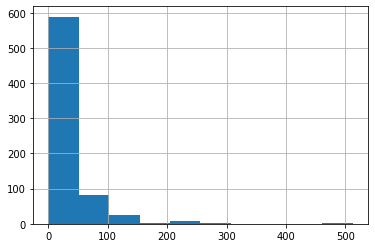

In [5]:
clean.describe_column('Fare')

31.139775421348318

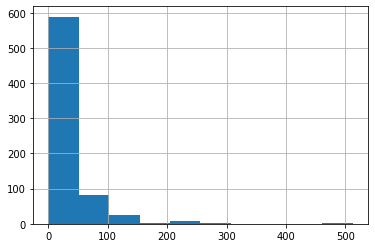

In [6]:
clean.describe_column('Fare')['mean']

In [7]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,548.000000,148.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.769663,0.207865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,139.000000,29.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.776536,0.162011,0.011173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
iter1 = clean.replace_missing_mostcommon('Fare', 'Embarked')

In [9]:
iter1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,NaN,7.925,S
1,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,NaN,13,S
2,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,NaN,26.25,S
3,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,NaN,8.05,S
4,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,NaN,7.225,C
5,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,NaN,31,C
6,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,C93,90,S
7,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,NaN,7.775,S
8,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,D26,77.2875,S
9,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,NaN,7.225,C


In [10]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,548.000000,148.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.769663,0.207865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,139.000000,29.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.776536,0.162011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


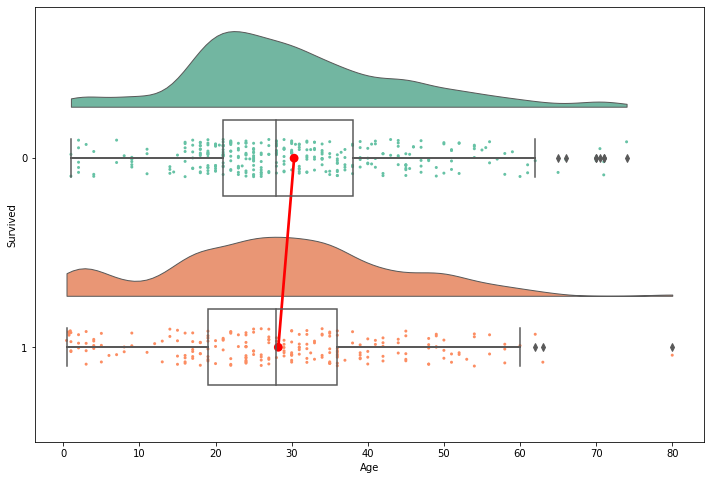

In [11]:
clean.visualize_raincloud('Age')

In [12]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,548.000000,148.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.769663,0.207865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,139.000000,29.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.776536,0.162011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
clean.replace_missing_random_discrete('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,NaN,7.925,S
1,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,NaN,13,S
2,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,NaN,26.25,S
3,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,NaN,8.05,S
4,774,0,3,"Elias, Mr. Dibo",male,52.0,0,0,2674,NaN,7.225,C
5,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,NaN,31,C
6,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,C93,90,S
7,668,0,3,"Rommetvedt, Mr. Knud Paust",male,19.0,0,0,312993,NaN,7.775,S
8,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,D26,77.2875,S
9,523,0,3,"Lahoud, Mr. Sarkis",male,36.0,0,0,2624,NaN,7.225,C


In [14]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,548.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.769663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,139.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.776536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
## Proving iter1 is a completely separate instance

iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,548.000000,148.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.769663,0.207865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,139.000000,29.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.776536,0.162011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
clean.visualize_barplot('Age', 'Survived', groupby='Age', method='mean', xlabel='Age')

In [17]:
clean.drop('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.925,S
1,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13,S
2,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.25,S
3,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.05,S
4,774,0,3,"Elias, Mr. Dibo",male,52.0,0,0,2674,7.225,C
5,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31,C
6,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90,S
7,668,0,3,"Rommetvedt, Mr. Knud Paust",male,19.0,0,0,312993,7.775,S
8,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,S
9,523,0,3,"Lahoud, Mr. Sarkis",male,36.0,0,0,2624,7.225,C


## Feature Engineering

In [18]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

feature = Feature(clean)

In [19]:
feature.apply(lambda x: Title_Dictionary[x['Name'].split(',')[1].split('.')[0].strip()], 'Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.925,S,Mr
1,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13,S,Mr
2,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.25,S,Miss
3,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.05,S,Mr
4,774,0,3,"Elias, Mr. Dibo",male,52.0,0,0,2674,7.225,C,Mr
5,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31,C,Miss
6,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90,S,Mrs
7,668,0,3,"Rommetvedt, Mr. Knud Paust",male,19.0,0,0,312993,7.775,S,Mr
8,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,S,Mr
9,523,0,3,"Lahoud, Mr. Sarkis",male,36.0,0,0,2624,7.225,C,Mr


In [20]:
feature['FamilySize'] = ( feature['SibSp'] + feature['Parch'],
                         feature.test_data['SibSp'] + feature.test_data['SibSp'] )

In [21]:
feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.925,S,Mr,0
1,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13,S,Mr,0
2,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.25,S,Miss,2
3,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.05,S,Mr,0
4,774,0,3,"Elias, Mr. Dibo",male,52.0,0,0,2674,7.225,C,Mr,0
5,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31,C,Miss,0
6,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90,S,Mrs,1
7,668,0,3,"Rommetvedt, Mr. Knud Paust",male,19.0,0,0,312993,7.775,S,Mr,0
8,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,S,Mr,1
9,523,0,3,"Lahoud, Mr. Sarkis",male,36.0,0,0,2624,7.225,C,Mr,0


In [22]:
## Can still do apply and it will apply to both train and test dataset.

def get_person(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    return 'child' if age < 16 else sex

feature.apply(get_person, 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.925,S,Mr,0,male
1,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13,S,Mr,0,male
2,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.25,S,Miss,2,child
3,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.05,S,Mr,0,male
4,774,0,3,"Elias, Mr. Dibo",male,52.0,0,0,2674,7.225,C,Mr,0,male
5,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31,C,Miss,0,female
6,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90,S,Mrs,1,female
7,668,0,3,"Rommetvedt, Mr. Knud Paust",male,19.0,0,0,312993,7.775,S,Mr,0,male
8,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,S,Mr,1,male
9,523,0,3,"Lahoud, Mr. Sarkis",male,36.0,0,0,2624,7.225,C,Mr,0,male


In [23]:
## Can still do lambda.

feature.apply(lambda x: 'child' if x['Age'] < 16 else x['Sex'], 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.925,S,Mr,0,male
1,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13,S,Mr,0,male
2,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.25,S,Miss,2,child
3,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.05,S,Mr,0,male
4,774,0,3,"Elias, Mr. Dibo",male,52.0,0,0,2674,7.225,C,Mr,0,male
5,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31,C,Miss,0,female
6,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90,S,Mrs,1,female
7,668,0,3,"Rommetvedt, Mr. Knud Paust",male,19.0,0,0,312993,7.775,S,Mr,0,male
8,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,S,Mr,1,male
9,523,0,3,"Lahoud, Mr. Sarkis",male,36.0,0,0,2624,7.225,C,Mr,0,male


In [24]:
feature.drop('Name', 'Ticket', 'SibSp', 'Parch', 'Sex')

,PassengerId,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,841,0,3,20.0,7.925,S,Mr,0,male
1,229,0,2,18.0,13,S,Mr,0,male
2,536,1,2,7.0,26.25,S,Miss,2,child
3,462,0,3,34.0,8.05,S,Mr,0,male
4,774,0,3,52.0,7.225,C,Mr,0,male
5,843,1,1,30.0,31,C,Miss,0,female
6,487,1,1,35.0,90,S,Mrs,1,female
7,668,0,3,19.0,7.775,S,Mr,0,male
8,103,0,1,21.0,77.2875,S,Mr,1,male
9,523,0,3,36.0,7.225,C,Mr,0,male


In [25]:
feature.onehot_encode('Person', 'Embarked', 'Title', 'Pclass')

,PassengerId,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person,Person_child,...,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,841,0,3,20.0,7.925,S,Mr,0,male,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,229,0,2,18.0,13,S,Mr,0,male,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,536,1,2,7.0,26.25,S,Miss,2,child,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,462,0,3,34.0,8.05,S,Mr,0,male,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,774,0,3,52.0,7.225,C,Mr,0,male,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,843,1,1,30.0,31,C,Miss,0,female,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,487,1,1,35.0,90,S,Mrs,1,female,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,668,0,3,19.0,7.775,S,Mr,0,male,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,103,0,1,21.0,77.2875,S,Mr,1,male,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,523,0,3,36.0,7.225,C,Mr,0,male,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modelling